In [1]:
import qiskit

In [2]:
from qiskit_aer.backends.aerbackend import AerBackend
from dc_qiskit_qml.encoding_maps import NormedAmplitudeEncoding
from dc_qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from dc_qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from dc_qiskit_qml.distance_based.hadamard.state.sparsevector import QiskitNativeStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(QiskitNativeStatePreparation())

execution_backend: AerBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_circuit_factory=initial_state_builder,
                                    encoding_map=NormedAmplitudeEncoding())

In [7]:
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

X, y = load_wine(return_X_y=True)

X_train = X[[33, 88, 144]]
y_train = y[[33, 88, 144]]

X_test = X[[28, 140]]
y_test = y[[28, 140]]

In [8]:
pipeline = Pipeline([
    ('scaler',  StandardScaler()),
    ('pca2',  PCA(n_components=2)),
    ('l2norm', Normalizer(norm='l2', copy=True)),
    ('qml', qml)
])

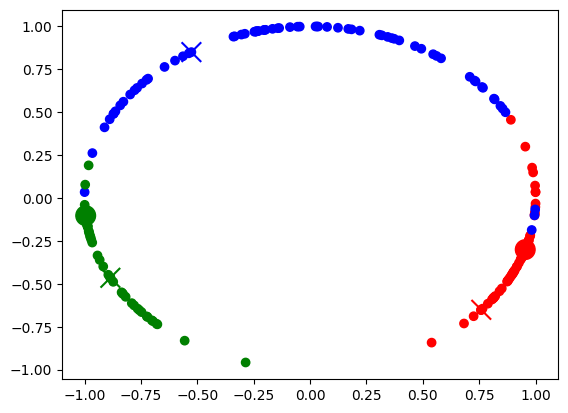

In [9]:
import matplotlib.pyplot as plt

_X = pipeline.fit_transform(X, y)
_X_train = pipeline.transform(X_train)
_X_test = pipeline.transform(X_test)

colors = ['red', 'blue', 'green', 'orange']

plt.scatter(
    _X[:,0], _X[:,1], 
    color=[colors[yy] for yy in y])
plt.scatter(
    _X_train[:,0], _X_train[:,1], 
    color=[colors[yy] for yy in y_train],
    marker='x', s=200)
plt.scatter(
    _X_test[:,0], _X_test[:,1], 
    color=[colors[yy] for yy in y_test],
    marker='o', s=200)
plt.show()

In [10]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test), y_test

([0, 2], array([0, 2]))

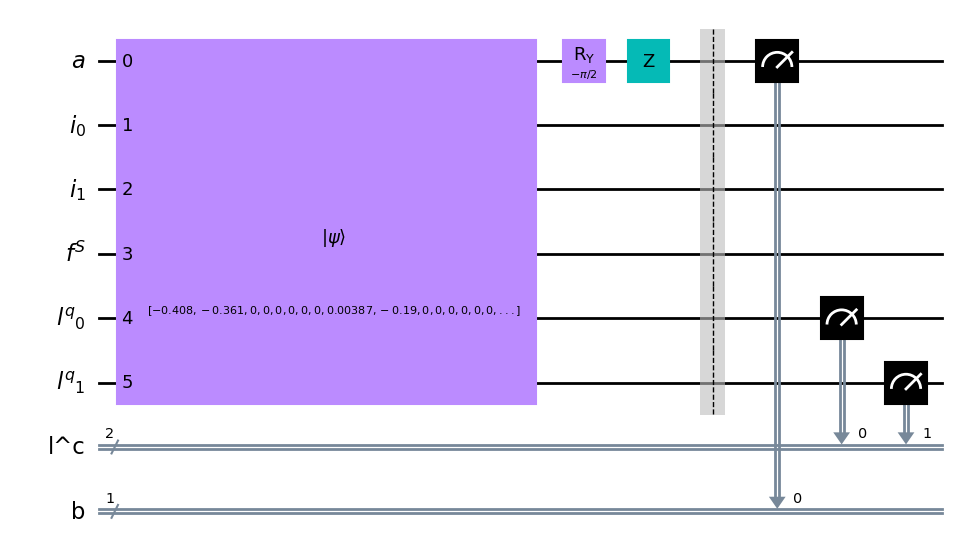

In [13]:
qml._last_predict_circuits[0].draw(output='mpl', fold=-1)